# 3. Magnitud observada de un avión comercial como función de la distancia a la cual está del observador. 

[Link al repositorio](https://github.com/juand4g/AstroML_202610.git)

Vamos a situarnos en el siguiente escenario: un avión comercial se aproxima a aterrizar en un aeropuerto. El observador corresponde a un señalero que está parado en la pista de modo que este está alineado con la trayectoria de aterrizaje. Y el aeropuerto va a ser el Aeropuerto Internacional El Dorado para ubicarnos en Bogotá. 

Las luces que dominan la luminosidad percibida en un avión que aterriza corresponden a las luces de aterrizaje o _landing lights_. De acuerdo con AeroLEDS (2020), la _Federal Aviation Administration_ (FAA) promueve el uso de luces de aterrizaje cuando se esté a 10 millas ($\sim 16 km$) de un aeropuerto y a menos de 10000 pies ($\sim 3 km$) de altura. En este mismo blog se menciona una luz LED recientemente desarrollada que emite 15400 lúmenes. Aunque en Smooth Aviation Ltd. (2019) también se muestran lámparas de aterrizaje LED de menos potencia: 4500 lm. Voy evaluar ambos casos para ver cómo cambia la magnitud según el flujo superficial de la fuente. Hay que tener en cuenta que estas luces están diseñadas para ver la pista desde muy lejos, así que probablemente surjan magnitudes aparentes muy brillantes, bastante lejanas de las de las estrellas.

Los aviones comerciales suelen tener 2 o 4 luces de aterrizaje, mientras que un avión pequeño puede llegar a tener solo una. En este ejercicio voy a evaluar los casos con 4 y 2 lámparas.

En Chandra (2018), se aproxima el flujo superficial emitido por una bombilla como uno isotrópico que se reparte en una esfera. Así, se relaciona con el flujo a través de $F=\frac{Q(\lambda_i \rightarrow \lambda_f)}{4\pi d^2}$, donde $Q(\lambda_i \rightarrow \lambda_f)$ es el flujo superficial de la bombilla en el rango visible (en lúmenes), $4\pi$ es el ángulo sólido en donde se reparte la energía (en ese caso, en una esfera) y $d$ la distancia entre la fuente y el observador. En el caso de lámparas de aterrizaje de aviones comerciales las lámparas tienen un _beam angle_ de, por ejemplo, 10° (Smooth Aviation Ltd, 2019). Esto indica que los lúmenes emitidos se reparte en un cono sólido muy pequeño. La versión más general de la fórmula de Chandra sería $F(d)=\frac{Q}{\Omega d^2}$, donde $\Omega$ es el ángulo sólido del haz. Si el ángulo total del haz es de $\theta=10°$, el semiángulo es de $\alpha=5°$.

El ángulo sólido de un cono es:
$$\Omega=2\pi (1-cos\alpha)$$
En nuestro caso:
$$\Omega \approx 0.02376 sr $$

Ahora hablemos de extinción atmosférica. Recordemos que toda la definición de extinción se basa en que la luz llega desde afuera de nuestra atmósfera, y se toma la altura de esta como 1 para tener una cantidad adimensional. De modo que $X$ viene siendo una medida de _cuántas atmósferas_ está atravesando la luz de una fuente antes de llegar al detector. 

En el caso que estamos estudiando, la fuente ya se encuentra dentro de la atmósfera, así que no podemos usar la definición astronómica de extinción.

La presión y la densidad tienen la misma dependencia exponencial con la altura, ya que están relacionadas linealmente por la ley de gases ideales. De este modo, la fórmula barométrica $p(h)=p_0exp \left( -\frac{h}{H}\right)$ (Berberan et al., 2010) nos da la forma de la dependencia de la densidad con la altura:

$$\rho(h)=\rho_0 e^{-h/H}$$

Donde H es la escala de altitud, cuyo valor es de aproximadamente $8.4 km$ (Berberan et al., 2010) y $h$ es la altura. De modo que la masa de aire desde altura $y$ hasta el suelo del aeropuerto (a la altura de Bogotá $h_B \approx 2600 $ m):

$$ X(y) \propto \int_{h_B}^y \rho_0 e^{-h/H} dh = \rho_0 H (e^{-h_B/H}-e^{-y/H})$$

Como $X$ se multiplica por el coeficiente $k$, es mejor absorber constantes y definir:

$$X(y) = e^{-h_B/H}-e^{-y/H}$$

Tomaremos el modelamiento desde una altura de 3048 m y a 16,093.4 m del observador, que coincide con la posición recomendada por la FAA para encender luces de aterrizaje, hasta una altura y distancia horizontal mínimas de 2 m.

In [9]:
import numpy as np
import matplotlib.pyplot as plt

N = 20000
_X = np.linspace(2., 16093.4, N) #Distancia horizontal
Y = np.linspace(2., 3048, N)
D = np.sqrt(_X**2 + Y**2)

La magnitud aparente (sin extinción) la calcularemos usando la fórmula $m_0=-2.5lg \left( \frac{F}{F_{Vega}} \right)$. Donde el flujo aparente de Vega es de $F_{Vega}=2.56 \cdot 10^{-6} lm \cdot m^{-2}$ (Chandra, 2018).

El aporte de la extinción será entonces $kX$. Para que la magnitud aparente total sea $m=m_0+kX$.

In [10]:
#Constantes
k = 0.42
inc_k=0.11
F_vega = 2.56e-6
rho0 = 1.225
H=8400
h_B = 2600


In [11]:
def X(y):
    return np.exp(-h_B/H) - np.exp(-y/H)

def M(q,n,Omega, d,X):
    F= (n*q) / (Omega*d**2)

    M0 = -2.5*np.log10(F/F_vega)
    M = M0 + k*X

    return M

In [12]:
x = X(Y) #masas de aire
Omega = 0.02376
M_4_HIGH = M(15400,4,Omega, D, x)
M_4_LOW = M(4500,4,Omega, D, x)
M_2_HIGH = M(15400,2, Omega, D, x)
M_2_LOW = M(4500, 2,Omega, D, x)

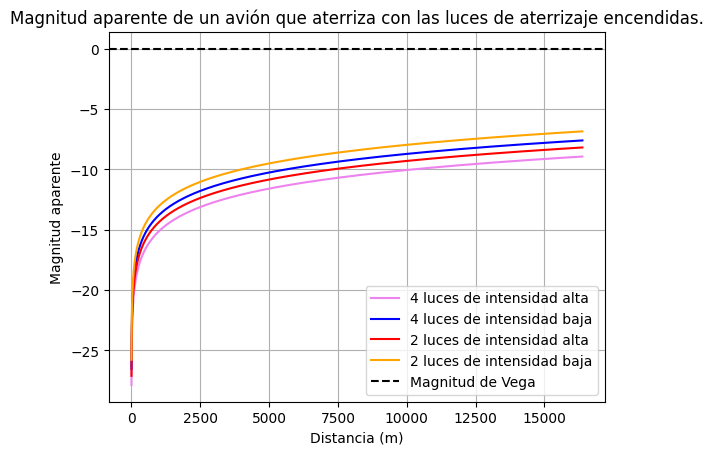

In [13]:
plt.plot(D,M_4_HIGH, c="violet", label="4 luces de intensidad alta")
plt.plot(D,M_4_LOW, c="blue", label="4 luces de intensidad baja")
plt.plot(D,M_2_HIGH, c="red" , label="2 luces de intensidad alta")
plt.plot(D,M_2_LOW, c="orange", label="2 luces de intensidad baja")
plt.xlabel("Distancia (m)")
plt.ylabel("Magnitud aparente")
plt.grid()
plt.axhline(0, label="Magnitud de Vega", c="black", linestyle="--")
plt.title("Magnitud aparente de un avión que aterriza con las luces de aterrizaje encendidas.")
plt.legend()

In [14]:
print(f"Magnitud más brillante para un avión con 4 luces de aterrizaje de 15400 lm: {np.min(M_4_HIGH)}")
print(f"Magnitud más brillante para un avión con 4 luces de aterrizaje de 4500 lm: {np.min(M_4_LOW)}")
print(f"Magnitud más brillante para un avión con 2 luces de aterrizaje de 15400 lm: {np.min(M_2_HIGH)}")
print(f"Magnitud más brillante para un avión con 2 luces de aterrizaje de 4500 lm: {np.min(M_2_LOW)}")
print("")
print(f"Magnitud menos brillante para un avión con 4 luces de aterrizaje de 15400 lm: {np.max(M_4_HIGH)}")
print(f"Magnitud menos brillante para un avión con 4 luces de aterrizaje de 4500 lm: {np.max(M_4_LOW)}")
print(f"Magnitud menos brillante para un avión con 2 luces de aterrizaje de 15400 lm: {np.max(M_2_HIGH)}")
print(f"Magnitud menos brillante para un avión con 2 luces de aterrizaje de 4500 lm: {np.max(M_2_LOW)}")

Magnitud más brillante para un avión con 4 luces de aterrizaje de 15400 lm: -27.86771637484547
Magnitud más brillante para un avión con 4 luces de aterrizaje de 4500 lm: -26.531945857192675
Magnitud más brillante para un avión con 2 luces de aterrizaje de 15400 lm: -27.11514138568552
Magnitud más brillante para un avión con 2 luces de aterrizaje de 4500 lm: -25.77937086803272

Magnitud menos brillante para un avión con 4 luces de aterrizaje de 15400 lm: -8.926226948608099
Magnitud menos brillante para un avión con 4 luces de aterrizaje de 4500 lm: -7.590456430955301
Magnitud menos brillante para un avión con 2 luces de aterrizaje de 15400 lm: -8.173651959448145
Magnitud menos brillante para un avión con 2 luces de aterrizaje de 4500 lm: -6.837881441795348


Esto nos muestra que desde el momento que un avión enciende sus luces de aterrizaje a 16 km del aeropuerto, la magnitud aparente ya es mucho más intensa que la de Vega. Es un objeto muy brillante que fácilmente quemaría la retina a una persona que se encuentre cerca del avión o mire directamente a estas luces por cierto tiempo.

Los aviones poseen otras luces que permanecen encendidas durante el vuelo, y no solo al aterrizar. Las luces de navegación o luces NAV se posicionan en las puntas de las alas y son de color rojo y verde, además de otra blanca en la cola. Sirven para indicar la posición del avión. En el catálogo de Smooth Aviation Ltd (2019) se muestran unas luces NAV con 66 lúmenes para el color rojo y de 120 lúmenes para el verde. Se evidencia inmediatamente que son mucho menos brillantes que las luces de aterrizaje. Estas luces suelen tener ángulos de , lo cual aplicando el mismo razonamiento que en el caso anterior, nos da un ángulo sólido de $\Omega_{NAV}=2.68$ sr. Podemos entonces trasladar el caso de estudio a distancias más grande, preguntándonos cómo cambia la magnitud de las luces NAV de las alas conforme se acerca al observador. 

En este caso vamos a estudiar distancias horizontales en el rango de 2m-100km y a una altura de 2m-12km.

In [15]:
N = 100000
_X = np.linspace(2., 100000, N) #Distancia horizontal
Y = np.linspace(2., 12000, N)
D = np.sqrt(_X**2 + Y**2)
Omega_NAV = 2.68

x = X(Y) #masas de aire
M_RED= M(66, 1, Omega_NAV, D, x)
M_GREEN = M(120, 1, Omega_NAV, D, x)

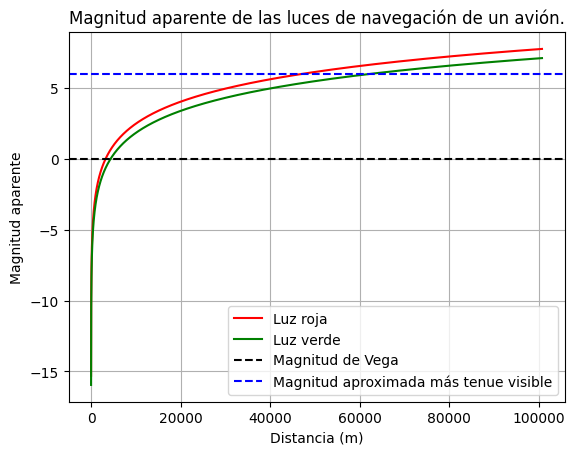

In [16]:
plt.plot(D,M_RED, c="red", label="Luz roja")
plt.plot(D,M_GREEN, c="green", label="Luz verde")
plt.xlabel("Distancia (m)")
plt.ylabel("Magnitud aparente")
plt.grid()
plt.axhline(0, label="Magnitud de Vega", c="black", linestyle="--")
plt.axhline(6, label="Magnitud aproximada más tenue visible", c="blue", linestyle="--")
plt.title("Magnitud aparente de las luces de navegación de un avión.")
plt.legend()

Esto nos muestra que, en condiciones atmosféricas no extremas, el avión se puede empezar a ver a simple vista por su luz NAV verde a alrededor de 60 km del observador. Mientras que la luz NAV roja comenzaría a ser visible a alrededor de 50 km. 

# Referencias
AeroLEDS. (2020). "FAA Encourages the use of Landing Lights for Increased Visibility". Link: ([FAA Encourages the use of Landing Lights for Increased Visibility](https://aeroleds.com/blogs/news/faa-encourages-the-use-of-landing-lights-for-increased-visibility#:~:text=Voted%20Best%20LED%20Landing%20Light,for%20daylight%20operations%20as%20well.))

Chandra, D. (2018). "Apparent magnitude scale: incandescent lamps". Phys. Educ. 53.

Díaz, R. (2015). "Determinación de los coeficientes de extinción atmosférica en bandas BVI". Departamento de Física. Universidad de los Andes. 

Smooth Aviation Ltd. (2019). "Aviation Lighting Catalogue". Link: ([Aviation Lighting Solutions](https://www.scribd.com/document/754876308/Aviation-Lighting-Catalogue-2019))

Berberan Santos, Mario N. & Bodunov, E. N. & Pogliani, Lionello. (2010). "On the barometric formula inside the Earth". Journal of Mathematical Chemistry. 47. 990-1004. 10.1007/s10910-009-9620-7. 